# DM - PROJECT
## Game of Thrones first and third book analysis
---------

## Data Cleaning


### Imports

In [78]:
import gutenbergpy as gutenbergpy
import gutenbergpy.textget
from siuba import filter
import siuba
import pandas as pd
import numpy as np
from afinn import Afinn
from plotnine import *
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
import re
from nltk import ngrams
from tidytext import unnest_tokens
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from tidytext import unnest_tokens
from siuba import *
from tidytext import *


game_path = "../resources/AGameOfThrones.txt"
sword_path = "../resources/StormOfSwords.txt"


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\drago\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\drago\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [37]:
with open(game_path, encoding="utf8") as f:
    game_text = f.readlines()

with open(sword_path, encoding="utf8") as g:
    sword_text = g.readlines()

game_before_df = pd.read_table(game_path, encoding="UTF-8")
swords_before_df = pd.read_table(sword_path, encoding="UTF-8")

In [82]:
def clean_dataframe(before_df) -> pd.DataFrame:
    df = before_df.copy()
    df.set_axis(
        ['content'], axis=1, inplace=True
    )

    df = df[df.word.notnull()].reset_index(drop=True)

    delimiters_string = ",.:?\'\'\"\"\n\r\t"
    delimiters = [',']
    for c in delimiters_string:
        delimiters.append(c)
    english_common = stopwords.words('english')
    df = df[~df['word'].isin(english_common)]
    df = df[~df['word'].isin(delimiters)]

    return df

In [41]:
game_df = clean_dataframe(game_before_df)
sword_df = clean_dataframe(swords_before_df)

sword_df.head(1500000)



,word
1,storm
3,swords
4,book
5,three
8,song
...,...
927892,nineteen
927893,wives
927894,previous
927895,table


         book        bigrams      word1      word2
0      creion        the day        the        day
1      creion       day Bran        day       Bran
2      creion      Bran fell       Bran       fell
3      creion         fell .       fell          .
4      creion           . He          .         He
...       ...            ...        ...        ...
61865  creion          raw ,        raw          ,
61866  creion          , Ned          ,        Ned
61867  creion  Ned reflected        Ned  reflected
61868  creion   reflected as  reflected         as
61869  creion          as he         as         he

[61870 rows x 4 columns]


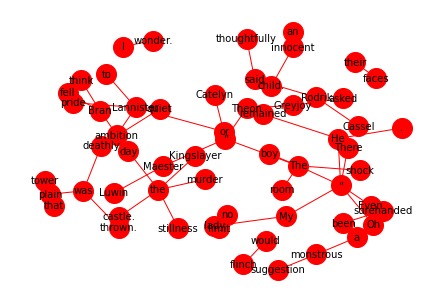

In [99]:
def create_bigram(text) -> pd.DataFrame:
    text_str = ""
    for string in text:
        text_str += string

    token = word_tokenize(text_str)
    df_bigrams = ngrams(token, 2)
    df_bigrams = [ ' '.join(grams) for grams in df_bigrams]
    df = pd.DataFrame({
        "book" : "creion",
        "bigrams": df_bigrams
    })
    df[['word1', 'word2']] = df['bigrams'].str.split(expand=True)
    print(df)
    return df


remove_words = []

punctuation_signs = ['I', '“', '.', '\'', "''", ';', '"', ',', '.', '!', '?', '/', '[', ']', '(', ')', '“', '”', '’', '‘', '``', "--"]
custom_stop_words = ["—he", "a","about","above","after","again","against","ain","all","am","an","and","any","are","aren","aren't","as","at","be","because","been","before","being","below","between","both","but","by","can","couldn","couldn't","d","did","didn","didn't","do","does","doesn","doesn't","doing","don","don't","down","during","each","few","for","from","further","had","hadn","hadn't","has","hasn","hasn't","have","haven","haven't","having","he","her","here","hers","herself","him","himself","his","how","i","if","in","into","is","isn","isn't","it","it's","its","itself","just","ll","m","ma","me","mightn","mightn't","more","most","mustn","mustn't","my","myself","needn","needn't","no","nor","not","now","o","of","off","on","once","only","or","other","our","ours","ourselves","out","over","own","re","s","same","shan","shan't","she","she's","should","should've","shouldn","shouldn't","so","some","such","t","than","that","that'll","the","their","theirs","them","themselves","then","there","these","they","this","those","through","to","too","under","until","up","ve","very","was","wasn","wasn't","we","were","weren","weren't","what","when","where","which","while","who","whom","why","will","with","won","won't","wouldn","wouldn't","y","you","you'd","you'll","you're","you've","your","yours","yourself","yourselves","could","he'd","he'll","he's","here's","how's","i'd","i'll","i'm","i've","let's","ought","she'd","she'll","that's","there's","they'd","they'll","they're","they've","we'd","we'll","we're","we've","what's","when's","where's","who's","why's","would","able","abst","accordance","according","accordingly","across","act","actually","added","adj","affected","affecting","affects","afterwards","ah","almost","alone","along","already","also","although","always","among","amongst","announce","another","anybody","anyhow","anymore","anyone","anything","anyway","anyways","anywhere","apparently","approximately","arent","arise","around","aside","ask","asking","auth","available","away","awfully","b","back","became","become","becomes","becoming","beforehand","begin","beginning","beginnings","begins","behind","believe","beside","besides","beyond","biol","brief","briefly","c","ca","came","cannot","can't","cause","causes","certain","certainly","co","com","come","comes","contain","containing","contains","couldnt","date","different","done","downwards","due","e","ed","edu","effect","eg","eight","eighty","either","else","elsewhere","end","ending","enough","especially","et","etc","even","ever","every","everybody","everyone","everything","everywhere","ex","except","f","far","ff","fifth","first","five","fix","followed","following","follows","former","formerly","forth","found","four","furthermore","g","gave","get","gets","getting","give","given","gives","giving","go","goes","gone","got","gotten","h","happens","hardly","hed","hence","hereafter","hereby","herein","heres","hereupon","hes","hi","hid","hither","home","howbeit","however","hundred","id","ie","im","immediate","immediately","importance","important","inc","indeed","index","information","instead","invention","inward","itd","it'll","j","k","keep","keeps","kept","kg","km","know","known","knows","l","largely","last","lately","later","latter","latterly","least","less","lest","let","lets","like","liked","likely","line","little","'ll","look","looking","looks","ltd","made","mainly","make","makes","many","may","maybe","mean","means","meantime","meanwhile","merely","mg","might","million","miss","ml","moreover","mostly","mr","mrs","much","mug","must","n","na","name","namely","nay","nd","near","nearly","necessarily","necessary","need","needs","neither","never","nevertheless","new","next","nine","ninety","nobody","non","none","nonetheless","noone","normally","nos","noted","nothing","nowhere","obtain","obtained","obviously","often","oh","ok","okay","old","omitted","one","ones","onto","ord","others","otherwise","outside","overall","owing","p","page","pages","part","particular","particularly","past","per","perhaps","placed","please","plus","poorly","possible","possibly","potentially","pp","predominantly","present","previously","primarily","probably","promptly","proud","provides","put","q","que","quickly","quite","qv","r","ran","rather","rd","readily","really","recent","recently","ref","refs","regarding","regardless","regards","related","relatively","research","respectively","resulted","resulting","results","right","run","said","saw","say","saying","says","sec","section","see","seeing","seem","seemed","seeming","seems","seen","self","selves","sent","seven","several","shall","shed","shes","show","showed","shown","showns","shows","significant","significantly","similar","similarly","since","six","slightly","somebody","somehow","someone","somethan","something","sometime","sometimes","somewhat","somewhere","soon","sorry","specifically","specified","specify","specifying","still","stop","strongly","sub","substantially","successfully","sufficiently","suggest","sup","sure","take","taken","taking","tell","tends","th","thank","thanks","thanx","thats","that've","thence","thereafter","thereby","thered","therefore","therein","there'll","thereof","therere","theres","thereto","thereupon","there've","theyd","theyre","think","thou","though","thoughh","thousand","throug","throughout","thru","thus","til","tip","together","took","toward","towards","tried","tries","truly","try","trying","ts","twice","two","u","un","unfortunately","unless","unlike","unlikely","unto","upon","ups","us","use","used","useful","usefully","usefulness","uses","using","usually","v","value","various","'ve","via","viz","vol","vols","vs","w","want","wants","wasnt","way","wed","welcome","went","werent","whatever","what'll","whats","whence","whenever","whereafter","whereas","whereby","wherein","wheres","whereupon","wherever","whether","whim","whither","whod","whoever","whole","who'll","whomever","whos","whose","widely","willing","wish","within","without","wont","words","world","wouldnt","www","x","yes","yet","youd","youre","z","zero","a's","ain't","allow","allows","apart","appear","appreciate","appropriate","associated","best","better","c'mon","c's","cant","changes","clearly","concerning","consequently","consider","considering","corresponding","course","currently","definitely","described","despite","entirely","exactly","example","going","greetings","hello","help","hopefully","ignored","inasmuch","indicate","indicated","indicates","inner","insofar","it'd","keep","keeps","novel","presumably","reasonably","second","secondly","sensible","serious","seriously","sure","t's","third","thorough","thoroughly","three","well","wonder"]

remove_words.extend(stopwords.words('english'))
remove_words.extend(punctuation_signs)
remove_words.extend(custom_stop_words)

game_df_bi = create_bigram(game_text[5000:10000])

game_df_bi_filtered = game_df_bi[~game_df_bi.word1.isin(remove_words)]
game_df_bi_filtered = game_df_bi[~game_df_bi.word2.isin(remove_words)]

game_df_bi_filtered

# my_freq = count(game_df_bi_filtered, _.book, _.bigrams, _.word1, _.word2, sort=True)
# my_tf_idf = bind_tf_idf(my_freq, 'bigrams', 'book', 'n')
# my_tf_idf

import networkx as nx

# Create our Graph object
game_df_bi_graph = count(game_df_bi_filtered.head(50), _.bigrams, _.word1, _.word2, sort=True).drop(columns=['bigrams'])
G = nx.from_pandas_edgelist(df=game_df_bi_graph, source='word1', target='word2', edge_attr='n')

import matplotlib.pyplot as plt

# Time to draw it
nx.draw(G, pos=nx.spring_layout(G, k=1.45, iterations=220), node_size=400, font_size=10, node_color='r', edge_color='r', with_labels=True)

plt.show()
# plt.savefig('plotgraph.png', dpi=300, bbox_inches='tight') # can also save it to file

